<a href="https://colab.research.google.com/github/valid999/DeepLearingProject_depthlayers/blob/main/Convolutional_neural_net__Hand_written.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convloutional neural network project

*  The project is working to predict the image of more than two million images of dogs and cats and the main purpose is to get the predict of the image using Deep neural network

In [67]:
# Working with handwritten numbers
import tensorflow as tf
mnist = tf.keras.datasets.mnist # 282*28 images
(x_train , y_train ) , (x_test , y_test)  = mnist.load_data()

# Make normalize for the data we scale tthe data between zero and one that's make the neural network easy to learn
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)

# Build the model
model = tf.keras.models.Sequential()
# the reason for the flatten is to make the images flatten with the architecture of the neural network
model.add(tf.keras.layers.Flatten()) # we wanna our images become flatten
model.add(tf.keras.layers.Dense(128 , activation  = tf.nn.relu))
model.add(tf.keras.layers.Dense(128 , activation  = tf.nn.relu))
model.add(tf.keras.layers.Dense(10  , activation = tf.nn.softmax)) #v because it is probability distributions
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(x_train , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2668 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1082 - accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0733 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0538 - accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0398 - accuracy: 0.9865


In [13]:
# Calculate the validation loss

val_loss , val_acc  = model.evaluate(x_test , y_test)
print(val_loss , val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.9740
0.08940314501523972 0.9739999771118164


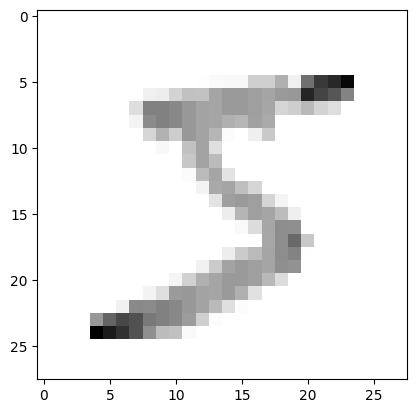

In [70]:
import matplotlib.pyplot as  plt

plt.imshow(x_train[0] , cmap = plt.cm.binary)
plt.show()

In [14]:
# Save the model
model.save('epic_num_reader.model')

In [15]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [50]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [57]:
import numpy as np
print(np.argmax(predictions[1]))

2


label(0)
 


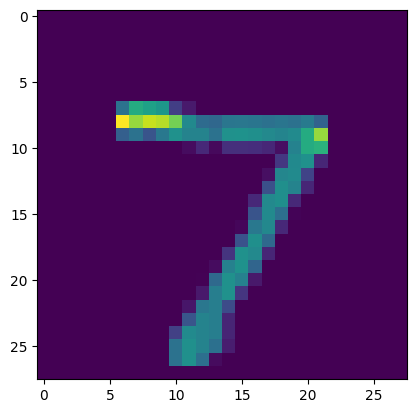

label(1)
 


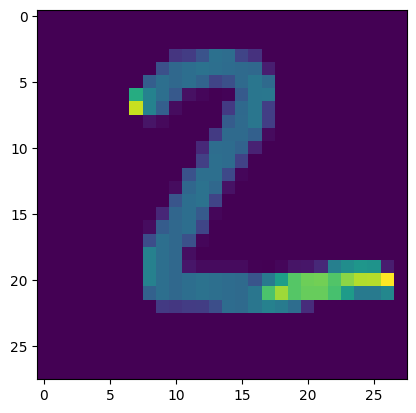

label(2)
 


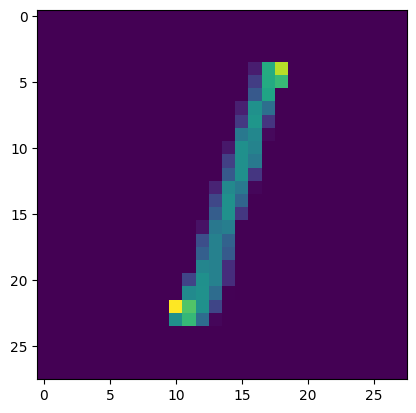

label(3)
 


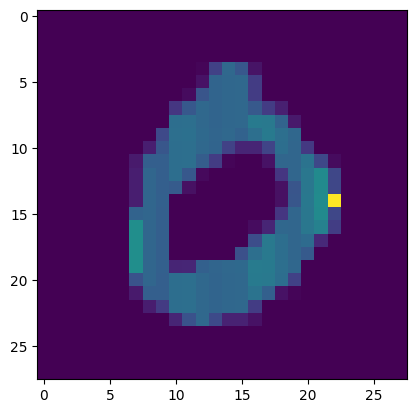

label(4)
 


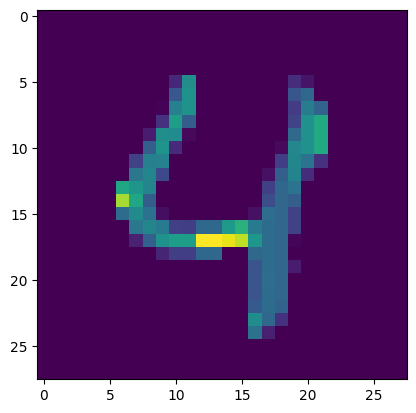

label(5)
 


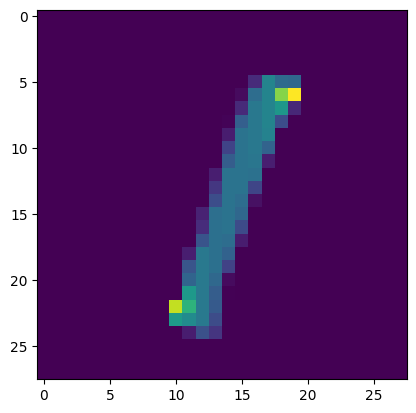

label(6)
 


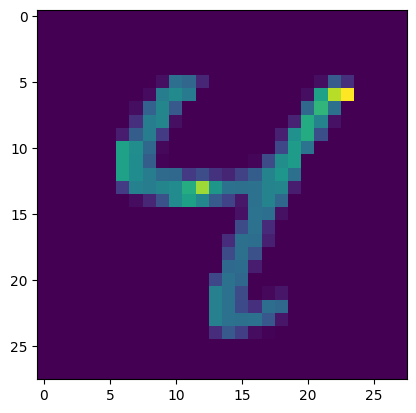

label(7)
 


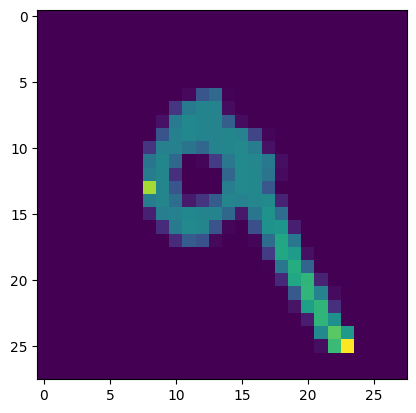

label(8)
 


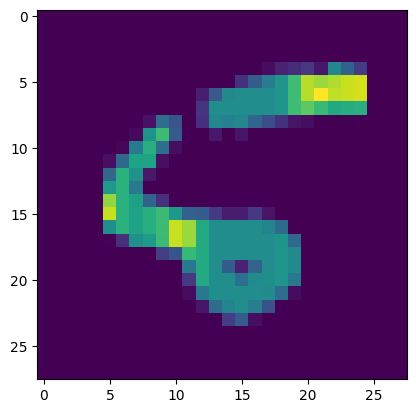

label(9)
 


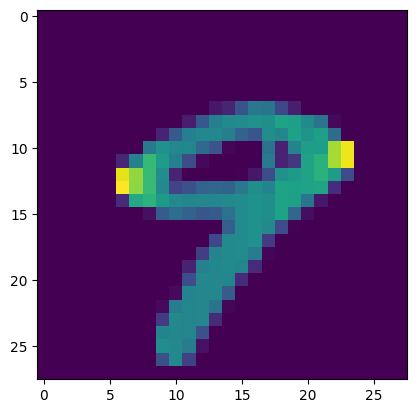

In [63]:
for i in range(10):

  plt.imshow(x_test[i])
  print(f'label({i})')
  print(" ")
  plt.show()

# Working with tha advanced model


11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28) , y=(60000,)
Test: X=(10000, 28, 28) , y=(10000,)


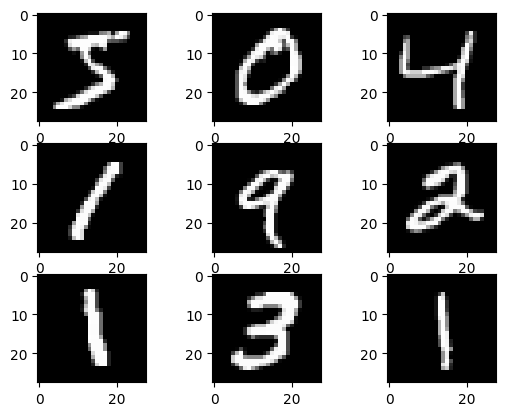

In [2]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# Load dataset
(trainX , trainy) , (testX , testy) = mnist.load_data()
# SUmmarize the loaded dataset
print('Train: X=%s , y=%s' % (trainX.shape , trainy.shape))
print('Test: X=%s , y=%s' % (testX.shape , testy.shape))
# plot first few images
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(trainX[i] , cmap = plt.get_cmap('gray'))
#show the figure
plt.show()

In [3]:
trainX.shape

(60000, 28, 28)

#### Model Evaluation Methodology



In [4]:
# record the model performace on a validation dataset during train
# We need to reshape the images to get the single color

trainX = trainX.reshape((trainX.shape[0] , 28, 28 , 1))
testX = testX.reshape((testX.shape[0] , 28, 28 , 1))


In [5]:
from keras.src.utils.np_utils import to_categorical
# One hot encode target vcalues
trainY = to_categorical(trainy)
testY = to_categorical(testy)

In [6]:
trainY[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
# Load train and test dataset
def load_dataset():
  # load dataset
  (trainX , trainY) , (testX , testY) = mnist.load_data()
  # reshape ndataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0] , 28 , 28 , 1))
  testX = testX.reshape((testX.shape[0] , 28 ,28 , 1))
  # One hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX , trainY , testX , testY

In [9]:
# normalize the pixel values of grayscale images  to range 0 and 1
# convert the values from the integers to float
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0# because the total number is 255
test_norm = test_norm / 255.0


In [10]:
# scale pixels
def prep_pixels(train , test):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm , test_norm


In [11]:
# define the cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32 , (3 ,3) , activation = 'relu' , kernal_initiazer = 'he_uniform' , input_shape = (28 ,28 , 1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100 , activation = 'relu' , kernal_initializer = 'he_uniform'))
  model.add(Dense(10 ,  activation = 'softmax'))
  # Compile the model
  opt  = SGD(learning_rate = 0.01 , momentum = 0.9)
  model.compile(optimizer = opt , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
  return model

#### Evaluate Model
After the model is defined , we need to evaluate it .


In [12]:
# Evaluate a model using k-fold cross validation
def evalaute_model(dataX , dataY , n_folds = 5):
  scores , histories = list() , list()
  #prepare cross validation
  kfold = KFold(n_folds , shuffle = True , random_state = 1)
  # enumerate splits
  for train_ix , test_ix in Kfold.split(dataX):

    # define model
    model = define_model()
    # select rows for the train and test
    trainX , trainY , testX, testY = dataX[train_ix] , dataY[train_ix] , dataX[test_ix] , dataY[test_ix]
    # fit model
    history = model.fit(trainX , trainY , epochs = 10 , batch_size = 32 , validation_data = (testX , testY) , verbose = 0)
    # evaluate model
    _ , acc = model.evaluate(testX , testY , verbose = 0)
    print(' > %.3f' % (acc * 100.0))
    # store scores
    scores.append(acc)
    histories.append(history)
  return scores , histories

In [13]:
# plot diagnostics learning curve
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    # plot loss
    plt.subplot(2 , 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'] , color = 'blue' , label = 'train')
    plt.plot(histories[i].history['val_loss'] , color = 'orange' , label = 'test' )
    # plot accuracy
    plt.subplot(2,1,2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'] , color = 'blue' , label = 'train')
    plt.plot(histories[i].history['val_accuracy'] , color = 'orange' , label = 'test')
    plt.show()

In [14]:
# Summarize model performance
def summarize_performance(scores):
  print('Accuracy: mean=%.3f , std=%.3f , n=%d' % (mean(scores) *100 , std(scores)*100 , len(scores)))
  plt.boxplot(scores)
  plt.show()

In [16]:
def run_test_harness():
  # load dataset
  trainX , trainY , testX , testY = load_datset()
  # prepare pixel data
  trainX , testX = prep_pixels(trainX , testX)
  # evaluate model
  scores , histories = evaluate_model(trainX , trainY)
  # learning curves
  summarize_diagnostics(histories)
  # Summarize estimated performance
  summarize_performance(scores)

# Advanced model

> 98.692
> 98.683
> 98.508
> 98.717
> 98.767


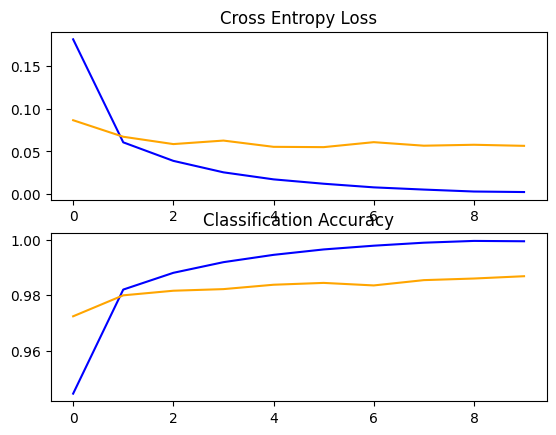

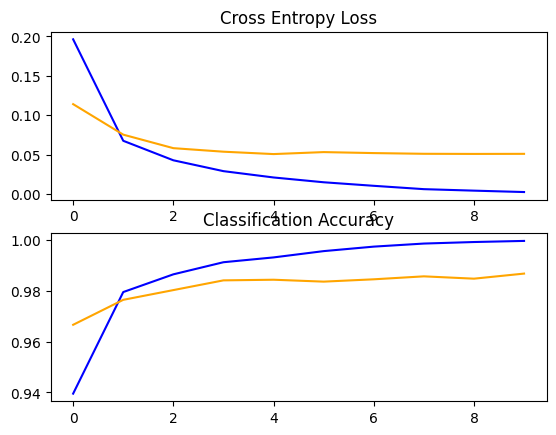

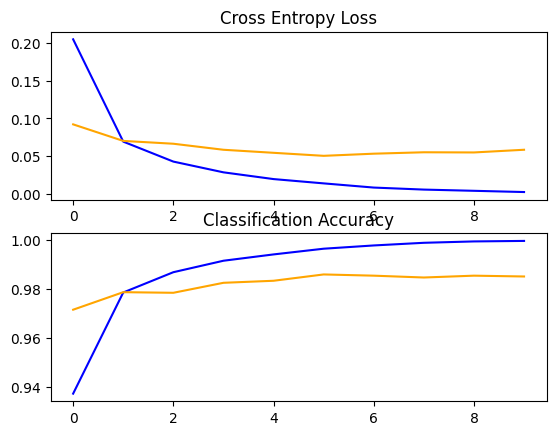

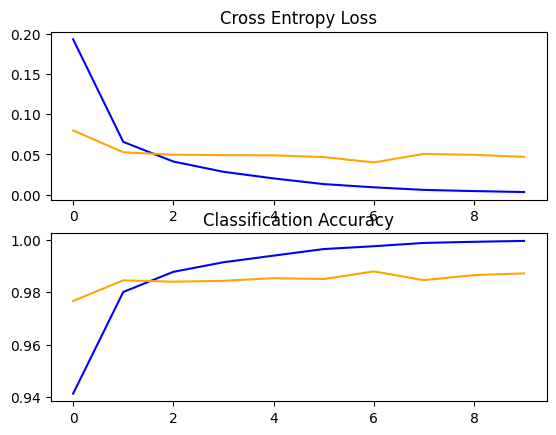

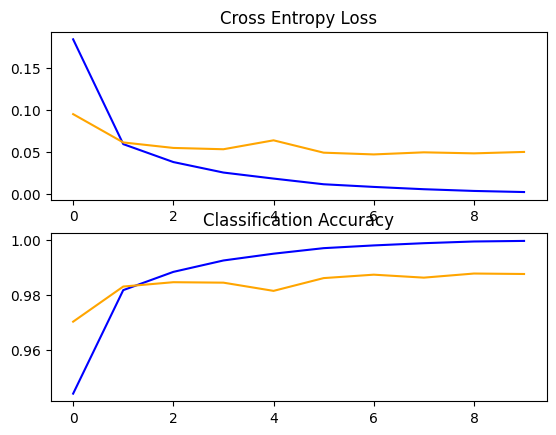

Accuracy: mean=98.673 std=0.087, n=5


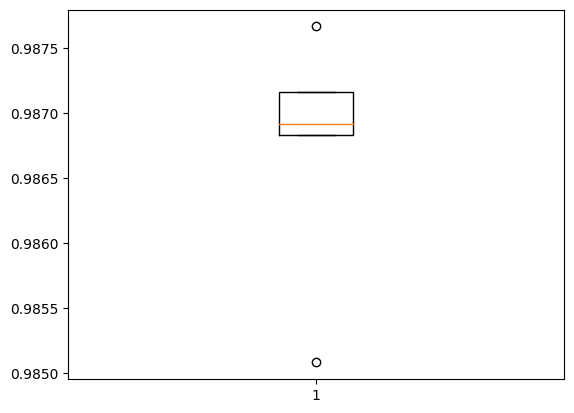

In [19]:
# all the code swe can test once

from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# load train and test dataset
def load_dataset():
 # load dataset
 (trainX, trainY), (testX, testY) = mnist.load_data()
 # reshape dataset to have a single channel
 trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
 testX = testX.reshape((testX.shape[0], 28, 28, 1))
 # one hot encode target values
 trainY = to_categorical(trainY)
 testY = to_categorical(testY)
 return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

# define cnn model
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.01, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
 scores, histories = list(), list()
 # prepare cross validation
 kfold = KFold(n_folds, shuffle=True, random_state=1)
 # enumerate splits
 for train_ix, test_ix in kfold.split(dataX):
 # define model
  model = define_model()
  # select rows for train and test
  trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
  # fit model
  history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  # stores scores
  scores.append(acc)
  histories.append(history)
 return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
 for i in range(len(histories)):
 # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

# summarize model performance
def summarize_performance(scores):
 # print summary
 print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
 # box and whisker plots of results
 plt.boxplot(scores)
 plt.show()

# run the test harness for evaluating a model
def run_test_harness():
 # load dataset
 trainX, trainY, testX, testY = load_dataset()
 # prepare pixel data
 trainX, testX = prep_pixels(trainX, testX)
 # evaluate model
 scores, histories = evaluate_model(trainX, trainY)
 # learning curves
 summarize_diagnostics(histories)
 # summarize estimated performance
 summarize_performance(scores)

# entry point, run the test harness
run_test_harness()